In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned.csv to cleaned.csv


In [2]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 78 kB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Learning rate set to 0.043582
0:	learn: 0.6510945	total: 92ms	remaining: 1m 31s
1:	learn: 0.6119871	total: 123ms	remaining: 1m 1s
2:	learn: 0.5777783	total: 154ms	remaining: 51.1s
3:	learn: 0.5478668	total: 166ms	remaining: 41.4s
4:	learn: 0.5231366	total: 178ms	remaining: 35.5s
5:	learn: 0.5016628	total: 201ms	remaining: 33.3s
6:	learn: 0.4836705	total: 213ms	remaining: 30.2s
7:	learn: 0.4678550	total: 237ms	remaining: 29.4s
8:	learn: 0.4523415	total: 295ms	remaining: 32.5s
9:	learn: 0.4400824	total: 324ms	remaining: 32s
10:	learn: 0.4274113	total: 355ms	remaining: 31.9s
11:	learn: 0.4184879	total: 389ms	remaining: 32s
12:	learn: 0.4117138	total: 427ms	remaining: 32.4s
13:	learn: 0.4060268	total: 459ms	remaining: 32.3s
14:	learn: 0.3971050	total: 493ms	remaining: 32.4s
15:	learn: 0.3899599	total: 512ms	remaining: 31.5s
16:	learn: 0.3838857	total: 531ms	remaining: 30.7s
17:	learn: 0.3779677	total: 545ms	remaining: 29.7s
18:	learn: 0.3729324	total: 604ms	remaining: 31.2s
19:	learn: 0.36

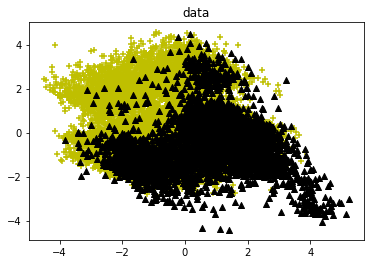

[0 0 0 ... 0 1 0]


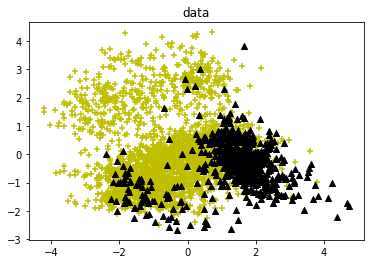

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

def splitData(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
    Y_train = np.expand_dims(Y_train, 1)
    Y_test = np.expand_dims(Y_test, 1)
    return X_train, X_test, Y_train, Y_test

def pca(X):
    pca = PCA(n_components=2)
    X_new = pca.fit_transform(X)
    return X_new

def visualize(X,Y):
    print(Y)
    plt.scatter(X[:,0][Y == 0], X[:,1][Y == 0], c='y', marker='+')
    plt.scatter(X[:,0][Y == 1], X[:,1][Y == 1], c='k', marker='^')
    plt.title("data")
    plt.savefig("data.png")
    plt.show()


data = pd.read_csv("cleaned.csv")

mapping = { ' <=50K': 0, ' >50K': 1 }
Y = data[' <=50K'].map(mapping) 

X = data.drop(' <=50K',1).to_numpy()

X_train, X_test, Y_train, Y_test = splitData(X,Y)
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
X = (X - mean) / std

cbt = cb.CatBoostClassifier(loss_function='Logloss')
cbt.fit(X_train, Y_train)
pred_test = cbt.predict(X_test)
print(pred_test)

print("F1 score:", f1_score(pred_test, Y_test))
print("precision score:", precision_score(pred_test, Y_test))
print("recall score:", recall_score(pred_test, Y_test))
print("accuracy", accuracy_score(pred_test, Y_test))

X_new = pca(X)
visualize(X_new,Y)

visualize(pca(X_test),pred_test)